# Walmart Store Sales Forecasting

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Walmart_logo.svg/2560px-Walmart_logo.svg.png)


<h2>1. Business Problem</h2>

<h6> Problem statement : </h6>
<p>Predict the sales for each department in each store based on evidence from historical sales data from Walmart stores.</p>

<h6> Source : </h6>
<p></p>

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview/description

<h6> Description : </h6>
<p>One challenge of modeling retail data is the need to make decisions based on limited history. If Christmas comes but once a year, so does the chance to see how strategic decisions impacted the bottom line.</p>
<p> To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, and it is challenging to predict which departments are affected and the extent of the impact.</p>

<h2>2. Machine Learning Problem Formulation</h2>

<h6> Data Overview : </h6>

- Source: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data
- We are provided with historical sales data for 45 Walmart stores located in different regions. 
- store.csv: Anonymized information about the 45 stores, indicating the type and size of store.
- train.csv: Historical training data, which covers to 2010-02-05 to 2012-11-01.
- test.csv:  Identical to train.csv, except we have withheld the weekly sales. we must predict the sales for each triplet of store, department, and date in this file.
- features.csv: Additional data related to the store, department, and regional activity for the given dates.
- The four holidays fall within the following weeks in the dataset (not all holidays are in the data):
<ul> 
    <li>
    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    </li>
    <li>
    Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    </li>
    <li>
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    </li>
    <li>
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
    </li>
</ul>


<h6> Type of ML Problem : </h6>
<p> This is clearly going to be a regression problem.</p>

<h6> KPI : </h6>
<p></p>
- Source: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview/evaluation
- Metric(s):
 weighted mean absolute error (WMAE):
 
<h6> Objectice : </h6>
<p>Predict the sales for each department in each store.</p>

<h2>3. Exploratory Data Analysis</h2>

In [1]:
# importing all required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import math

<h3>3.1 Reading Data</h3>

In [2]:
# reading training data

train_df = pd.read_csv('train.csv')
print('Number of data points : ', train_df.shape[0])
print('Number of features : ', train_df.shape[1])
print('Features : ', train_df.columns.values)
train_df.head()

Number of data points :  421570
Number of features :  5
Features :  ['Store' 'Dept' 'Date' 'Weekly_Sales' 'IsHoliday']


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
# reading test data

test_df = pd.read_csv('test.csv')
print('Number of data points : ', test_df.shape[0])
print('Number of features : ', test_df.shape[1])
print('Features : ', test_df.columns.values)
test_df.head()

Number of data points :  115064
Number of features :  4
Features :  ['Store' 'Dept' 'Date' 'IsHoliday']


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
# reading store data

store_df = pd.read_csv('stores.csv')
print('Number of data points : ', store_df.shape[0])
print('Number of features : ', store_df.shape[1])
print('Features : ', store_df.columns.values)
store_df.head()

Number of data points :  45
Number of features :  3
Features :  ['Store' 'Type' 'Size']


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
# reading feature data

features_df = pd.read_csv('features.csv')
print('Number of data points : ', features_df.shape[0])
print('Number of features : ', features_df.shape[1])
print('Features : ', features_df.columns.values)
features_df.head()

Number of data points :  8190
Number of features :  12
Features :  ['Store' 'Date' 'Temperature' 'Fuel_Price' 'MarkDown1' 'MarkDown2'
 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment' 'IsHoliday']


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
# reading submission data

sampleSubmission_df = pd.read_csv('sampleSubmission.csv')
print('Number of data points : ', sampleSubmission_df.shape[0])
print('Number of features : ', sampleSubmission_df.shape[1])
print('Features : ', sampleSubmission_df.columns.values)
sampleSubmission_df.head()

Number of data points :  115064
Number of features :  2
Features :  ['Id' 'Weekly_Sales']


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


As store_df has more sense of data, let's merge the information from `features_df` into `train_df`.
We are going to use outer left join.

In [7]:
feature_store = features_df.merge(store_df, how='inner', on = "Store")

In [8]:
train = train_df.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])
test = test_df.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [9]:
train.shape, test.shape

((421570, 16), (115064, 15))

In [10]:
train['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [11]:
train.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [12]:
counts = train.nunique()
counts

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64

<AxesSubplot:>

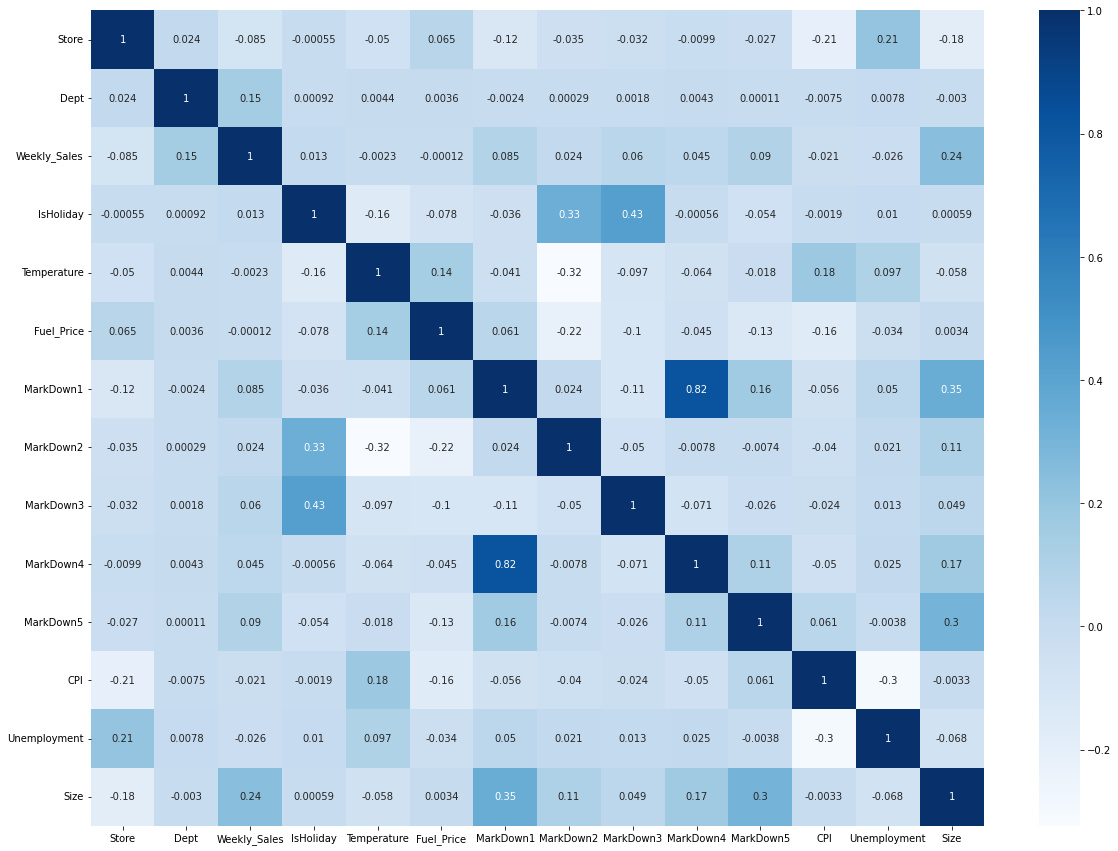

In [13]:
#drawing correlation matrix
corr = train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot = True, cmap='Blues')

<h4>Observations :</h4>
<p></p>

1. None of the features has NaN values except for Markdown features. 
2. `Markdown` features have lot of NaN values and hence we can drop them.
3. `CPI` has very low correlation with weekly sales and hence does not have any impact on weekly sales. 
4. Same is applicable for `Temperature`, `Unemployment` and `Fuel_Price`.
5. We can see little correlation between `Size` and weekly sales.

<h3>3.2 Data Cleaning</h3>

<h4>Date</h4>

We can split date into Day, Year and Months and then it will make more sense of data. First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [14]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    df = df.drop(['Date'], axis=1, inplace=True)

In [15]:
split_date(train)
split_date(test)

In [16]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,WeekOfYear
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
2,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
3,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
4,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5


Text(0.5, 1.0, 'Sales in different Stores')

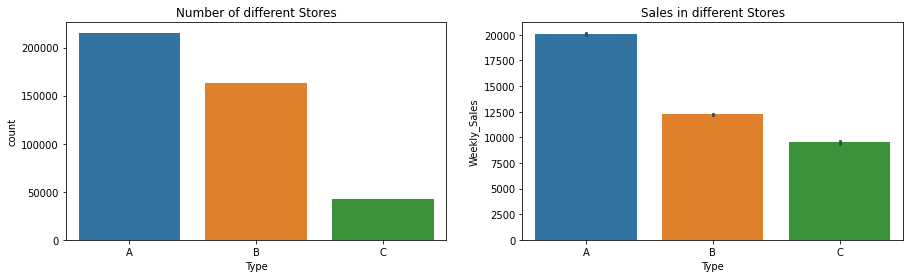

In [17]:
#drawing weekly sales in different StoreTypes

#drawing plots of StoreTypes and no of customers in different StoreTypes

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.countplot(x='Type', data=train, ax=axis1).set_title('Number of different Stores')
sns.barplot(x='Type', y='Weekly_Sales', data=train, ax=axis2).set_title('Sales in different Stores')

Text(0.5, 1.0, 'Weekly sales in different depatments')

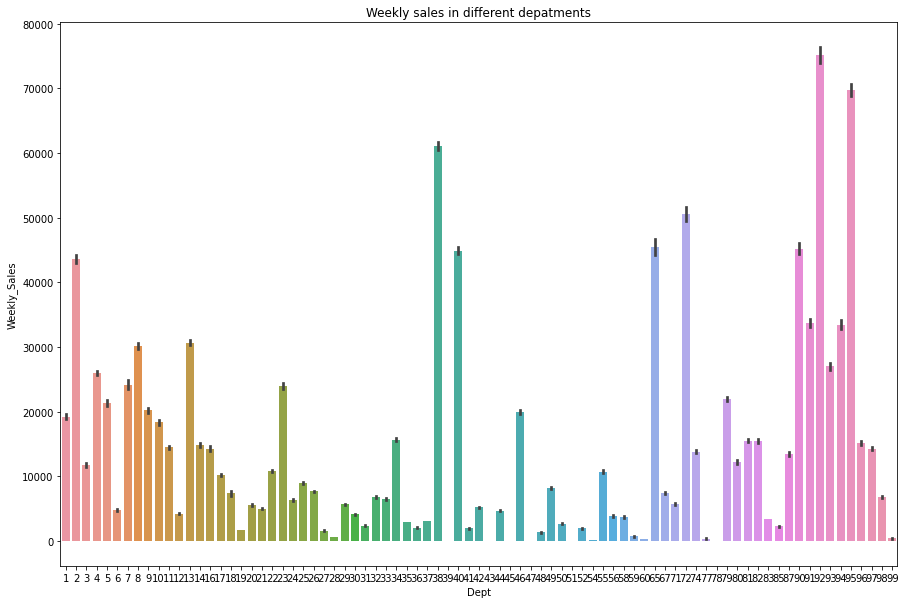

In [18]:
#drawing weekly sales in different departments

plt.figure(figsize=(15,10))
sns.barplot(x='Dept', y='Weekly_Sales', data=train).set_title('Weekly sales in different depatments')

Text(0.5, 1.0, 'Sales on holidays')

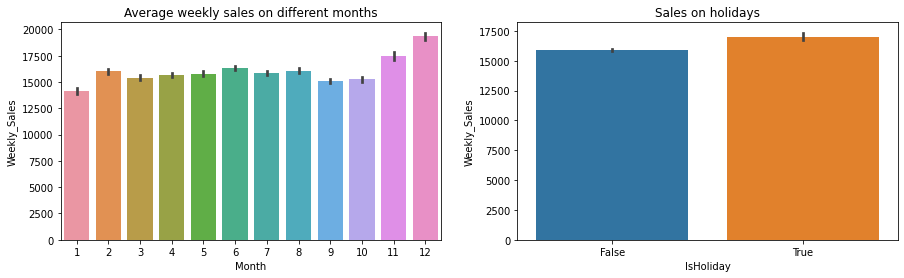

In [19]:
#drawing plots of DayOfWeek vs Sales and DayOfWeek vs Customers

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Month', y='Weekly_Sales', data=train, ax=axis1).set_title('Average weekly sales on different months')
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train, ax=axis2).set_title('Sales on holidays')

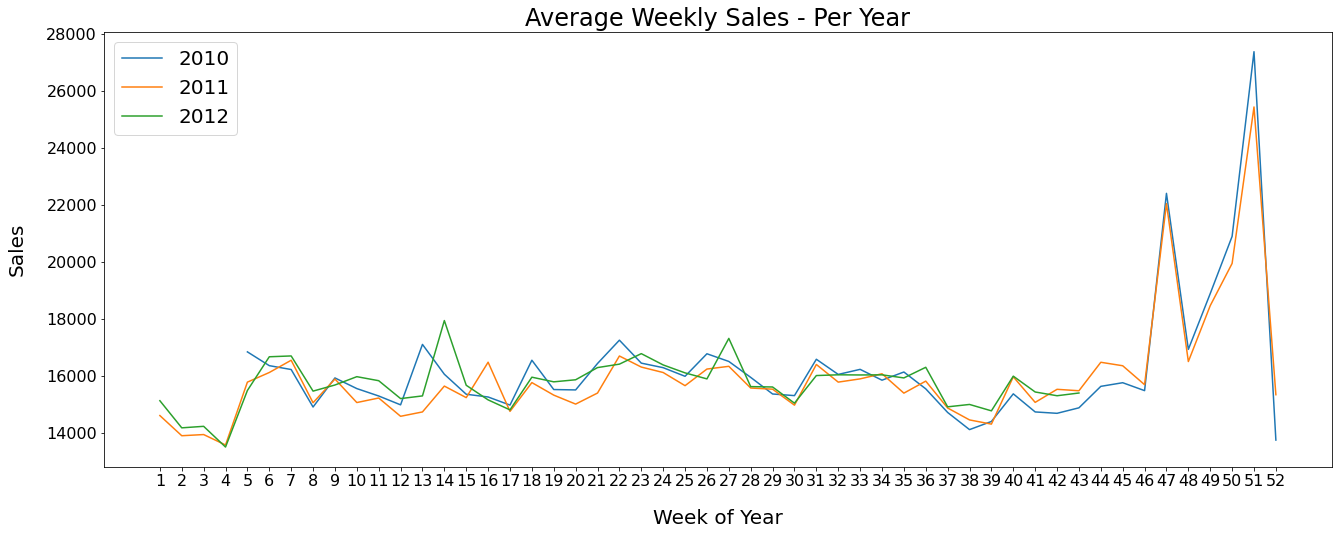

In [20]:
weekly_sales_2010 = train[train.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = train[train.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = train[train.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

<h4>Observations :</h4>
<p></p>

1. We don't have complete data for year 2012.
2. Sales have grown significantly during last few weeks of the year.
3. Store Type A has larest numbers of stores across locations and has highes Sales as well.
4. Sales are almost costant till October

In [21]:
train = train.drop(['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5'], axis=1)
test = test.drop(['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5'], axis=1)

In [22]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,WeekOfYear
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5
2,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5
3,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5
4,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5


In [23]:
numeric_cols = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price','CPI', 'Unemployment', 'Year', 'Month', 'Day', 
                'WeekOfYear']
categorical_cols = ['IsHoliday', 'Type']

<h4>Scale Numeric Values :</h4>
<p></p>
Its always a good practice to normalize the numerical features. Let's scale numeric values to the 0 to 1 range.

In [24]:
# defining function for scaling numerical features

def min_max_scaler(df):
    scaler = MinMaxScaler().fit(df[numeric_cols])
    df[numeric_cols] = scaler.transform(df[numeric_cols])

In [25]:
# scaling numerical data
min_max_scaler(train)
min_max_scaler(test)

<h4>Encode Categorical Columns :</h4>
<p></p>
Let's also encode categorical values, so that model can model performance.

In [26]:
# defining function for encoding categorical features
encoded_cols = []
def one_hot_encoder(df):
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols])
    encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
    df[encoded_cols] = encoder.transform(df[categorical_cols])
    df = df.drop(df.loc[:, categorical_cols].columns, axis=1, inplace = True)

In [27]:
# encoding categorical features
one_hot_encoder(train)
one_hot_encoder(test)

In [28]:
train.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,WeekOfYear,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,0.0,0.000000,24924.50,0.434149,0.0501,0.8405,0.405118,0.630267,0.0,0.090909,0.133333,0.078431,1.0,0.0,1.0,0.0,0.0
1,0.0,0.010204,50605.27,0.434149,0.0501,0.8405,0.405118,0.630267,0.0,0.090909,0.133333,0.078431,1.0,0.0,1.0,0.0,0.0
2,0.0,0.020408,13740.12,0.434149,0.0501,0.8405,0.405118,0.630267,0.0,0.090909,0.133333,0.078431,1.0,0.0,1.0,0.0,0.0
3,0.0,0.030612,39954.04,0.434149,0.0501,0.8405,0.405118,0.630267,0.0,0.090909,0.133333,0.078431,1.0,0.0,1.0,0.0,0.0
4,0.0,0.040816,32229.38,0.434149,0.0501,0.8405,0.405118,0.630267,0.0,0.090909,0.133333,0.078431,1.0,0.0,1.0,0.0,0.0


In [29]:
train.shape

(421570, 17)

In [30]:
train['IsHoliday_False'].value_counts()

1.0    391909
0.0     29661
Name: IsHoliday_False, dtype: int64

In [31]:
train['IsHoliday_True'].value_counts()

0.0    391909
1.0     29661
Name: IsHoliday_True, dtype: int64

<h3>3.3 Train Test Set Split</h3>

In [32]:
# targets

Y_train_temp = train['Weekly_Sales']
Y_train_temp.head()

0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64

In [33]:
# inputs

X_train_temp = train[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Day', 
                 'WeekOfYear','IsHoliday_False', 'IsHoliday_True', 'Type_A', 'Type_B', 'Type_C']]

In [34]:
# Splitting and training
train_inputs, test_inputs, train_targets, test_targets = train_test_split(X_train_temp, Y_train_temp, test_size=0.25, random_state=42)

In [35]:
train_inputs.shape, test_inputs.shape, train_targets.shape, test_targets.shape

((316177, 16), (105393, 16), (316177,), (105393,))

<h2>4. Machine Learning Model Selection</h2>

Lets go through different considerations in model selection:
1. Type of model - We will have to look for a regression supervised model. Options available are Linear Regression, DT, RF, XGBoost, Neural Network.
2. Size of the training data - We have enough data points,  421570 train data points and therefore we can have a low bias/high variance algorithm like Decision trees.
2. Interpretability - Not very important consideration in our problem statement, higher accuracy at the cost of low interpretability.
3. Speed or Training time - Time is not a business constraint, we can go for high training time.

We wil consider RF and XGBoost and compare accuracies.

<h2>5. Model Performance</h2>

<h3>5.1 XG Boost Regressor</h3>

<h4>Model Training & Prediction :</h4>
<p> </p>

In [36]:
# importing XGBRegressor
from xgboost import XGBRegressor

<h5>Base Model XG Boost</h5>

In [37]:
model_xg = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [38]:
# fitting the model
model_xg = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4).fit(train_inputs,train_targets)

In [39]:
# predict the output
train_pred = model_xg.predict(train_inputs)
train_pred.shape

(316177,)

<h4>Evaluation :</h4>
<p> As our evaluation metric is WMAE we will have to find out the weights for each data point as below.</p>
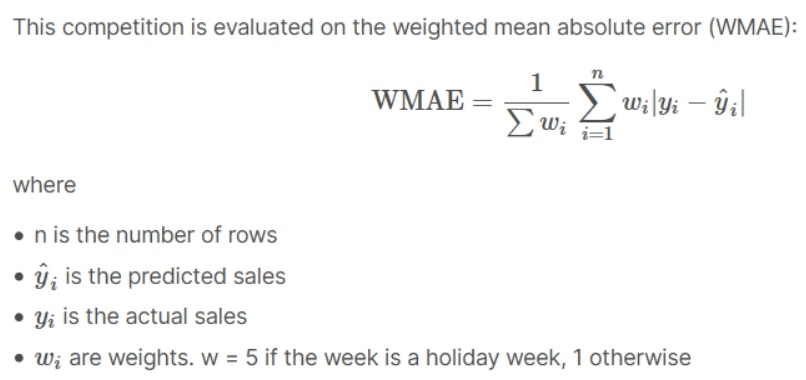

In [40]:
# defining function for weight calculation

def weight_calculation(df):
    weights = []
    for val in df['IsHoliday_False']:
        if val == 0:
            weights.append(5)
        else:
            weights.append(1)
    return weights

In [41]:
# calculating weights for training data
train_weights = weight_calculation(train_inputs)

In [42]:
len(train_weights)

316177

In [43]:
print(np.unique(train_weights))

[1 5]


In [44]:
train_weights.count(1), train_weights.count(5)

(294075, 22102)

In [45]:
# function to calculate WMPA

def weighted_absolute_mean_error(weights, y_actual, y_pred):
    sum_weights = 0
    sum = 0 
    start_time = time.time()
    for i in range(len(weights)):
        sum += abs(y_actual[i] - y_pred[i])*weights[i]
        sum_weights += weights[i]
    WMAE = sum/sum_weights
    return WMAE

In [46]:
# WMPA calculation for training set
train_wmae = weighted_absolute_mean_error(train_weights, train_targets.tolist(), train_pred)
print('Training WMAE for XG Boost is :', train_wmae)

Training WMAE for XG Boost is : 6514.53722578108


<h4>Interpretability for XG Boost:</h4>
<p> As XG Boost is highly interpretable, lets see the feature importance of our features. </p>

In [47]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_xg.feature_importances_
}).sort_values('importance', ascending=False)

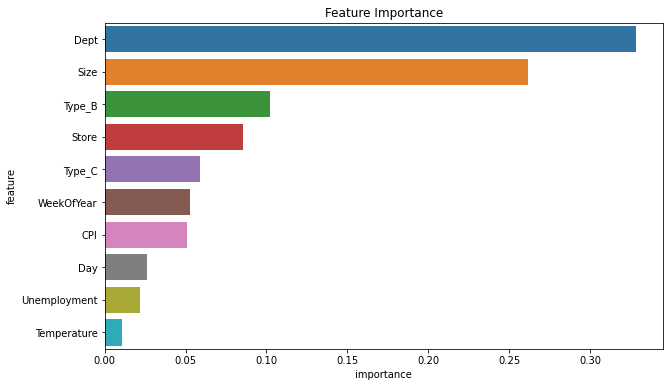

In [48]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

<h4>Performation on Test data points(XG Boost) :</h4>
<p> Lets perform test validation for this model. </p>

In [49]:
# predict the output for test dataset
test_pred = model_xg.predict(test_inputs)
test_pred

array([20859.258,  7795.854,  7176.801, ...,  4448.408, 25438.01 ,
        7401.839], dtype=float32)

In [50]:
# calculating weights for training data
test_weights = weight_calculation(test_inputs)

In [51]:
test_weights.count(1), test_weights.count(5)

(97834, 7559)

In [52]:
# WMPA calculation for training set
test_wmae = weighted_absolute_mean_error(test_weights, test_targets.tolist(), test_pred)
print('Testing WMAE is :', test_wmae)

Testing WMAE is : 6614.44861515229


<h4>Observations :</h4>
<p></p>

1. As we see the WMPA for train and test data points are pretty close to each other so we can say that our model is performing well and there is no overfitting observed.
2. We will have to do some hyperparameter tuning just to ensure we have right choice of hyperparameters.

<h4>Hyperparamer Tuning(XG Boost) :</h4>
<p></p>

In XG Boost we have different hyperparameters like `n_estimators`, `max_depth` etc. Let's do some tuning of these hyperparamater and observe the errors.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [53]:
# function for testing different hyperparameters' values
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_wmpa = weighted_absolute_mean_error(train_weights, train_targets.tolist(), model.predict(train_inputs))
    test_wmpa = weighted_absolute_mean_error(test_weights, test_targets.tolist(), model.predict(test_inputs))
    print('Max Depth: {}, Learning Rate: {}, Train_wmpa: {}, Test_wmpa: {}'.format(model.max_depth, model.learning_rate, 
                                                                                   train_wmpa, test_wmpa))
    return {'Learning Rate': model.learning_rate, 'Max Depth': model.max_depth, 'Training Error': train_wmpa, 
            'Testing Error': test_wmpa}

`n_estimators` 

The number of trees to be created. More trees = greater capacity of the model. We will test for different values.

In [54]:
test_params(max_depth = 15, n_estimators=50)

Max Depth: 15, Learning Rate: None, Train_wmpa: 455.16928955813546, Test_wmpa: 1392.3227659078334


{'Learning Rate': None,
 'Max Depth': 15,
 'Training Error': 455.16928955813546,
 'Testing Error': 1392.3227659078334}

In [55]:
test_params(max_depth = 15, n_estimators=100)

Max Depth: 15, Learning Rate: None, Train_wmpa: 284.7320419104028, Test_wmpa: 1376.4001256782099


{'Learning Rate': None,
 'Max Depth': 15,
 'Training Error': 284.7320419104028,
 'Testing Error': 1376.4001256782099}

In [56]:
test_params(max_depth = 15, n_estimators=150)

Max Depth: 15, Learning Rate: None, Train_wmpa: 196.67695981373748, Test_wmpa: 1373.7237129815705


{'Learning Rate': None,
 'Max Depth': 15,
 'Training Error': 196.67695981373748,
 'Testing Error': 1373.7237129815705}

In [57]:
test_params(max_depth = 15, n_estimators=200)

Max Depth: 15, Learning Rate: None, Train_wmpa: 143.60502386906867, Test_wmpa: 1373.6137537550694


{'Learning Rate': None,
 'Max Depth': 15,
 'Training Error': 143.60502386906867,
 'Testing Error': 1373.6137537550694}

`max_depth` 

The maximum depth of a tree. As we increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set. Lets experiment with different values of max_depth, plot a graph of the training and validation error and determine the optimal.

In [58]:
%%time
errors_df_max_depth = pd.DataFrame([test_params(max_depth = md, n_estimators=200) for md in range(10, 20)])

Max Depth: 10, Learning Rate: None, Train_wmpa: 933.8457748138011, Test_wmpa: 1550.5384686033035
Max Depth: 11, Learning Rate: None, Train_wmpa: 690.849749913641, Test_wmpa: 1460.3761995936404
Max Depth: 12, Learning Rate: None, Train_wmpa: 496.06110770933304, Test_wmpa: 1406.3795791602256
Max Depth: 13, Learning Rate: None, Train_wmpa: 343.19242531518876, Test_wmpa: 1396.8424211402728
Max Depth: 14, Learning Rate: None, Train_wmpa: 234.15539108601274, Test_wmpa: 1378.0133900908447
Max Depth: 15, Learning Rate: None, Train_wmpa: 143.60502386906867, Test_wmpa: 1373.6137537550694
Max Depth: 16, Learning Rate: None, Train_wmpa: 76.51394166810948, Test_wmpa: 1378.4389939065748
Max Depth: 17, Learning Rate: None, Train_wmpa: 40.175397459766735, Test_wmpa: 1387.352426065327
Max Depth: 18, Learning Rate: None, Train_wmpa: 16.815780024979276, Test_wmpa: 1403.6948497589337
Max Depth: 19, Learning Rate: None, Train_wmpa: 6.900487856050928, Test_wmpa: 1396.5471049714586
Wall time: 15min 58s


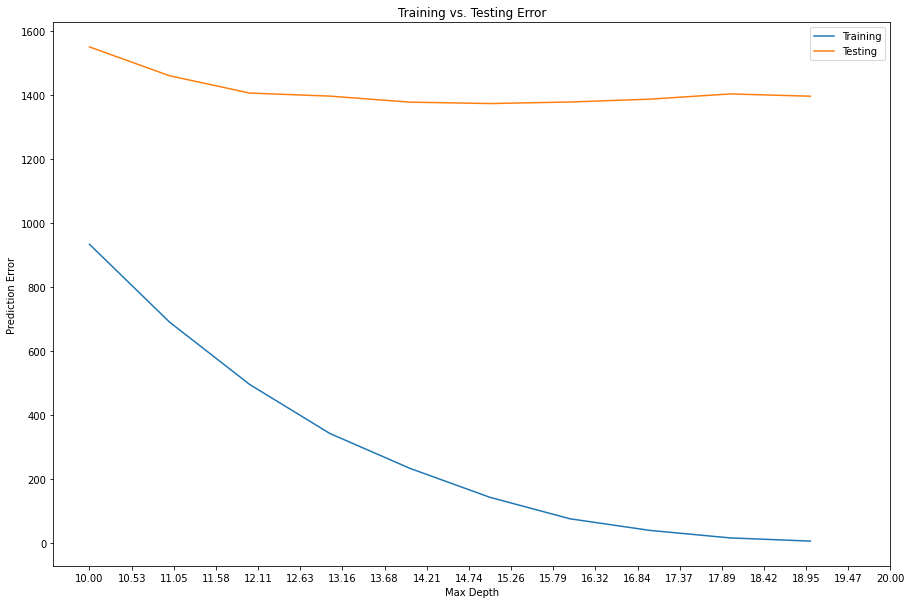

In [59]:
plt.figure(figsize=(15,10))
plt.plot(errors_df_max_depth['Max Depth'], errors_df_max_depth['Training Error'])
plt.plot(errors_df_max_depth['Max Depth'], errors_df_max_depth['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(np.linspace(10, 20, num=20))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error')
plt.legend(['Training', 'Testing'])

`learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [60]:
%%time
errors_df_learning_rate_xg = pd.DataFrame([test_params(n_estimators=200, max_depth = 15, learning_rate = lr) for lr in np.linspace(0.1, 0.8, num=10)])

Max Depth: 15, Learning Rate: 0.1, Train_wmpa: 349.9594258612187, Test_wmpa: 1300.8240223829855
Max Depth: 15, Learning Rate: 0.17777777777777778, Train_wmpa: 252.53230688855723, Test_wmpa: 1321.3023968086627
Max Depth: 15, Learning Rate: 0.25555555555555554, Train_wmpa: 174.12014116116518, Test_wmpa: 1350.3709110927803
Max Depth: 15, Learning Rate: 0.33333333333333337, Train_wmpa: 116.69772262841698, Test_wmpa: 1403.1692984847716
Max Depth: 15, Learning Rate: 0.4111111111111111, Train_wmpa: 86.26157967290945, Test_wmpa: 1455.461657210356
Max Depth: 15, Learning Rate: 0.48888888888888893, Train_wmpa: 56.09046720491998, Test_wmpa: 1514.6872768090539
Max Depth: 15, Learning Rate: 0.5666666666666667, Train_wmpa: 45.515022255067, Test_wmpa: 1550.09962425613
Max Depth: 15, Learning Rate: 0.6444444444444445, Train_wmpa: 30.64358167344821, Test_wmpa: 1635.4363871269122
Max Depth: 15, Learning Rate: 0.7222222222222222, Train_wmpa: 22.48525769558582, Test_wmpa: 1722.0746248192079
Max Depth: 15,

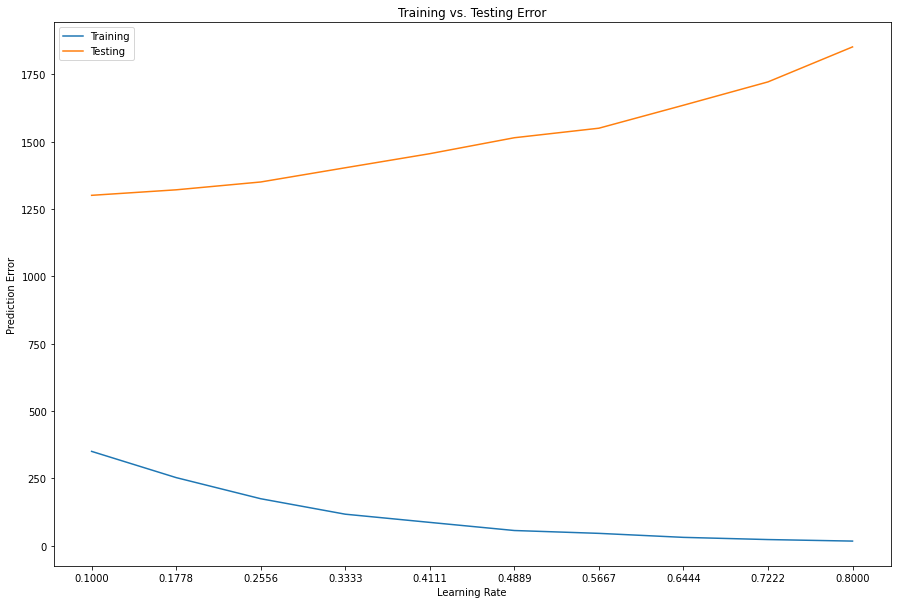

In [61]:
plt.figure(figsize=(15,10))
plt.plot(errors_df_learning_rate_xg['Learning Rate'], errors_df_learning_rate_xg['Training Error'])
plt.plot(errors_df_learning_rate_xg['Learning Rate'], errors_df_learning_rate_xg['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(np.linspace(0.1, 0.8, num=10))
plt.xlabel('Learning Rate')
plt.ylabel('Prediction Error')
plt.legend(['Training', 'Testing'])

<h4>Observations :</h4>
<p></p>

1. As we see WMAE decreases as we increase the `n_estimators`. Lets keep the optimal count to 500.
2. As we see the training and testing error curve converges with variation in `max_depth`. The best value would be the minima of testing error curve. Lets adopt max_depth value as 15.
3. Also we see the Training and Validation for `learning_rate` and its convergence. We will adopt 0.1.
4. We can hypertune more parameters like max_leaf_nodes, alpha etc. for the best result.

Lets evaluate our best model with tuned parameter `max_depth` and see WMAE & the coefficient of determination.

In [64]:
# calculating model core test data
model_tuned_xg_best = XGBRegressor(n_jobs=-1, random_state=42, max_depth = 15, n_estimators=200, learning_rate=0.1)
model_tuned_xg_best.fit(train_inputs, train_targets)
print('The testing score of the model is :', model_tuned_xg_best.score(test_inputs,test_targets))
train_wmpa_xg_best = weighted_absolute_mean_error(train_weights, train_targets.tolist(), 
                                                  model_tuned_xg_best.predict(train_inputs))
test_wmpa_xg_best = weighted_absolute_mean_error(test_weights, test_targets.tolist(), 
                                                 model_tuned_xg_best.predict(test_inputs))
print('Training WMPA is : ',train_wmpa_xg_best)
print('Testing WMPA is : ',test_wmpa_xg_best)

The testing score of the model is : 0.9839565767136519
Training WMPA is :  349.9594258612187
Testing WMPA is :  1300.8240223829855


<h3>5.2 Random Forest Regressor</h3>

<h4>Model Training & Prediction :</h4>

In [65]:
# importing XGBRegressor

from sklearn.ensemble import RandomForestRegressor

<h5>Base Model Random Forest</h5>

In [66]:
# fitting the model with Hyperparameter Overfitting
model_rf = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
model_rf.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=58)

In [67]:
# predicting output
train_pred_rf = model_rf.predict(train_inputs)
train_pred_rf.shape

(316177,)

We have already calculated weights for train_inputs before `train_weights`, lets use that to calculate `WMAE`

<h4>Evaluation :</h4>
<p> As our evaluation metric is WMAE we will have to find out the weights for each data point as below.</p>

In [68]:
# WMPA calculation for training set
train_wmae_rf = weighted_absolute_mean_error(train_weights, train_targets.tolist(), train_pred_rf)
print('Training WMAE for Random Forest is :', train_wmae_rf)

Training WMAE for Random Forest is : 1613.4443174623764


In [69]:
# calculating model core training data
print('The training score of the model is :',model_rf.score(train_inputs,train_targets))

The training score of the model is : 0.9856293691972348


<h4>Interpretability for Random Forest :</h4>
<p> As Random Forest is highly interpretable, lets look at the feature importance of our features. </p>

In [70]:
# Let's turn this into a dataframe and visualize the most important features.
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

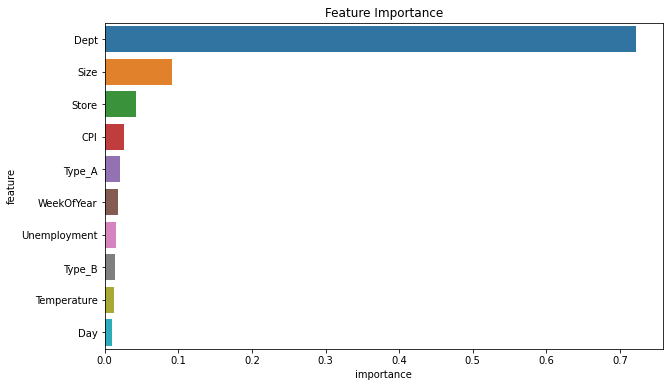

In [71]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

<h4>Performation on Test data points(RF) :</h4>
<p> Lets perform test validation for this model. </p>

In [72]:
# predict the output for test dataset
test_pred_rf = model_rf.predict(test_inputs)
test_pred_rf

array([21894.55958621,  6792.22440138,  4716.86356897, ...,
        1586.31581609, 28299.98563849, 15977.3139598 ])

In [73]:
# calculating weights for training data
test_weights_rf = weight_calculation(test_inputs)

In [74]:
# WMPA calculation for training set
test_wmae_rf = weighted_absolute_mean_error(test_weights, test_targets.tolist(), test_pred)
print('Testing WMAE is :', test_wmae_rf)

Testing WMAE is : 6614.44861515229


In [75]:
# calculating model core test data
print('The testing score of the model is :',model_rf.score(test_inputs,test_targets))

The testing score of the model is : 0.9355674289006096


<h4>Observations :</h4>
<p></p>

1. As we see the WMPA for train and test data points have significantly difference this may be because of overfitting.
2. We will have to do some hyperparameter tuning just to ensure we have right choice of hyperparameters.

<h4>Hyperparamer Tuning(Random Forest) :</h4>
<p></p>

In Random Forest we have different hyperparameters like `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf` etc. Let's do some tuning of few of these hyperparamater and observe the errors.

In [76]:
# function for testing different hyperparameters' values
def test_params_rf(**params):
    model = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_wmpa = weighted_absolute_mean_error(train_weights, train_targets.tolist(), model.predict(train_inputs))
    test_wmpa = weighted_absolute_mean_error(test_weights_rf, test_targets.tolist(), model.predict(test_inputs))
    print('Model Score is :', model.score(test_inputs,test_targets))
    return {'No of Estimators': model.n_estimators,'Max Features': model.max_features, 'Max Depth': model.max_depth,
            'Training Error': train_wmpa, 'Testing Error': test_wmpa}

`max_depth` - The maximum depth of a tree. As we increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set. Lets experiment with different values of max_depth, plot a graph of the training and validation error and determine the optimal.

In [77]:
%%time
errors_df_max_depth_rf = pd.DataFrame([test_params_rf(max_depth = md, n_estimators=58) for md in range(15, 35)])

Model Score is : 0.9664701819107182
Model Score is : 0.97141222982658
Model Score is : 0.9745309245249161
Model Score is : 0.9765260648099566
Model Score is : 0.9775569616403864
Model Score is : 0.9781631857706408
Model Score is : 0.9786834568936187
Model Score is : 0.9785587419091917
Model Score is : 0.9785588237107675
Model Score is : 0.9786968837242295
Model Score is : 0.9790003498770553
Model Score is : 0.9786591123918852
Model Score is : 0.9787568674353947
Model Score is : 0.9789539541730058
Model Score is : 0.9787154363789347
Model Score is : 0.9786880294081889
Model Score is : 0.9788069930533901
Model Score is : 0.9788027263263507
Model Score is : 0.9787302440784948
Model Score is : 0.978824864380479
Wall time: 13min 6s


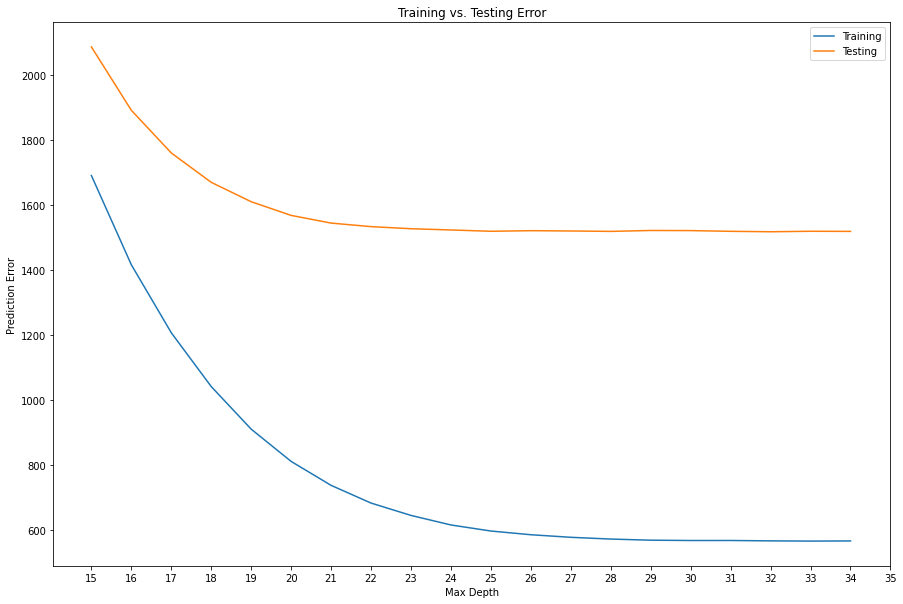

In [78]:
plt.figure(figsize=(15,10))
plt.plot(errors_df_max_depth_rf['Max Depth'], errors_df_max_depth_rf['Training Error'])
plt.plot(errors_df_max_depth_rf['Max Depth'], errors_df_max_depth_rf['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(np.linspace(15, 35, num=21))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error')
plt.legend(['Training', 'Testing'])

`n_estimators` - The number of trees to be created. More trees = greater capacity of the model. We will test for different values.

In [79]:
test_params_rf(max_depth = 32, n_estimators=58)

Model Score is : 0.9788027263263507


{'No of Estimators': 58,
 'Max Features': 'auto',
 'Max Depth': 32,
 'Training Error': 565.8184919743795,
 'Testing Error': 1517.5512643697743}

In [80]:
test_params_rf(max_depth = 32, n_estimators=100)

Model Score is : 0.9789451105077606


{'No of Estimators': 100,
 'Max Features': 'auto',
 'Max Depth': 32,
 'Training Error': 558.6202373207329,
 'Testing Error': 1512.1285826644562}

In [81]:
test_params_rf(max_depth = 32, n_estimators=200)

Model Score is : 0.9790223601657586


{'No of Estimators': 200,
 'Max Features': 'auto',
 'Max Depth': 32,
 'Training Error': 554.0931879281255,
 'Testing Error': 1507.2110077302611}

<h4>Observations :</h4>
<p></p>

1. As we see the training and testing error converges it stops towards the end.
2. Lets adopt `max_depth` value as 32.
3. Also we see `n_estimators` impacts WMAE directly and we will 200.
3. We can hypertune more parameters like max_leaf_nodes, alpha etc further in the same fashion.

Lets evaluate our best model with tuned parameter `max_depth` and see WMAE & the coefficient of determination.

In [82]:
# calculating model core test data
model_tuned_rf = RandomForestRegressor(n_jobs=-1, random_state=42, max_depth = 32, n_estimators=200)
model_tuned_rf.fit(train_inputs, train_targets)
print('The testing score of the model is :', model_tuned_rf.score(test_inputs,test_targets))
train_wmpa_rf_best = weighted_absolute_mean_error(train_weights, train_targets.tolist(), model_tuned_rf.predict(train_inputs))
test_wmpa_rf_best = weighted_absolute_mean_error(test_weights_rf, test_targets.tolist(), model_tuned_rf.predict(test_inputs))
print('Training WMPA is : ',train_wmpa_rf_best)
print('Testing WMPA is : ',test_wmpa_rf_best)

The testing score of the model is : 0.9790223601657586
Training WMPA is :  554.0931879281258
Testing WMPA is :  1507.2110077302607


<h4>Observations :</h4>
<p></p>

1. There is a significant improvement when compared to base model
2. By doing further we can improve this score to a optimum level.

<h2>5. Conclusion</h2>
<p>As we see the value of WMAE and R2 score in case of XG Boost is considerably better  than Random Forest. So we can adopt XG Boost and proceed.</p>

<h2>6. Predict Output using our model</h2>
<p> Let's predict the output for the test data provided in our business problem.</p>
<p> Remember! We have also performed EDA on test data before.</p>

In [83]:
test.head()

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,WeekOfYear,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,0.0,0.000000,0.573142,0.410215,0.943588,0.443438,0.630267,0.0,0.909091,0.033333,0.843137,1.0,0.0,1.0,0.0,0.0
1,0.0,0.010204,0.573142,0.410215,0.943588,0.443438,0.630267,0.0,0.909091,0.033333,0.843137,1.0,0.0,1.0,0.0,0.0
2,0.0,0.020408,0.573142,0.410215,0.943588,0.443438,0.630267,0.0,0.909091,0.033333,0.843137,1.0,0.0,1.0,0.0,0.0
3,0.0,0.030612,0.573142,0.410215,0.943588,0.443438,0.630267,0.0,0.909091,0.033333,0.843137,1.0,0.0,1.0,0.0,0.0
4,0.0,0.040816,0.573142,0.410215,0.943588,0.443438,0.630267,0.0,0.909091,0.033333,0.843137,1.0,0.0,1.0,0.0,0.0


In [84]:
test.shape

(115064, 16)

In [85]:
test.isna().sum()

Store                  0
Dept                   0
Temperature            0
Fuel_Price             0
CPI                38162
Unemployment       38162
Size                   0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
IsHoliday_False        0
IsHoliday_True         0
Type_A                 0
Type_B                 0
Type_C                 0
dtype: int64

<h4>Observations :</h4>
<p></p>

1. As we see there are significant amount of NaN values in column `CPI` and `Unemployment`.
2. We will replace these NaN values with their mean and before feeding it to our model.

In [86]:
test['CPI'].fillna(test['CPI'].mean(), inplace=True)
test['Unemployment'].fillna(test['Unemployment'].mean(), inplace=True)

In [87]:
test.isna().sum()

Store              0
Dept               0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Size               0
Year               0
Month              0
Day                0
WeekOfYear         0
IsHoliday_False    0
IsHoliday_True     0
Type_A             0
Type_B             0
Type_C             0
dtype: int64

In [88]:
output = model_tuned_xg_best.predict(test)
output

array([36329.1    , 47969.953  , 10755.798  , ..., 55510.58   ,
        5858.661  ,   738.25543], dtype=float32)

In [89]:
sampleSubmission_df['Weekly_Sales'] = output
sampleSubmission_df.head()
sampleSubmission_df.to_csv('submission.csv',index=False)